In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_real = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/test_target_1_with_8_attributes.csv")
df_tf = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/tf_out_class_8x32x8.csv")
df_q16_16 = pd.read_csv(f"/content/drive/MyDrive/network-traffic-classification-main/csv-files/p4_out_v2_8x32x8_test_2.csv")

display(df_real)
display(df_tf)
display(df_q16_16)


,target
0,0
1,2
2,6
3,2
4,7
...,...
15995,6
15996,2
15997,5
15998,1


,tf_predictions,0,1,2,3,4,5,6,7
0,0,12.575712,-42.372482,-70.831540,-7.920772,-7.074174,9.577455,-25.462414,-11.505157
1,2,-5.190148,-3.171153,4.642579,-2.992795,-16.792824,-4.646975,-2.038897,-6.116599
2,6,-5.149601,-4.396872,-2.521145,-6.371729,-13.975699,-4.982615,2.143238,-6.137033
3,2,-1.763537,3.373341,5.672126,1.172785,-6.663898,0.161763,-35.294150,-2.828020
4,7,-2.328394,-8.537320,-5.575788,-0.860971,-0.537411,2.583973,-20.554985,3.452464
...,...,...,...,...,...,...,...,...,...
15995,6,-5.149825,-4.396043,-2.521155,-6.371696,-13.974702,-4.982522,2.141872,-6.137139
15996,2,-4.522655,0.263326,1.682048,0.405633,-2.767360,-0.567644,-13.218902,-4.823558
15997,5,6.763655,-60.141670,-105.024080,0.239401,-0.883759,8.647840,-76.820900,-1.508886
15998,1,-3.824180,2.980085,-4.786016,-5.851792,-8.078332,-2.293163,-4.959659,-4.972622


,s126_id,s126_data_1,s126_data_2,s126_data_3,s126_data_4,s126_data_5,s126_data_6,s126_data_7,s126_data_8,s101_id,s101_data_1,s101_data_2,s101_data_3,s101_data_4,s101_data_5,s101_data_6,s101_data_7,s101_data_8
0,126,101,0,99,99,99,99,99,99,101,12.228439,-42.059998,-71.292648,-9.717575,-6.985046,10.403824,-24.965500,-10.046539
1,126,101,2,99,99,99,99,99,99,101,-5.421066,-1.727844,4.262146,-3.684570,-14.599762,-2.820908,-3.957245,-4.245300
2,126,101,6,99,99,99,99,99,99,101,-5.176788,-3.154739,-2.998611,-6.654327,-12.203613,-4.092346,-1.593491,-5.400116
3,126,101,2,99,99,99,99,99,99,101,-2.798538,3.360046,5.359802,0.259766,-7.277740,-0.126038,-29.131531,-2.400284
4,126,101,7,99,99,99,99,99,99,101,-3.870331,-7.345596,-6.433640,-2.489517,2.357727,2.162308,-16.841644,2.800964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,126,101,6,99,99,99,99,99,99,101,-5.176682,-3.154297,-2.998856,-6.654144,-12.203094,-4.092438,-1.594391,-5.400085
15996,126,101,2,99,99,99,99,99,99,101,-5.785675,0.690948,0.764297,-2.016754,-3.154587,0.570389,-11.625671,-3.587875
15997,126,101,5,99,99,99,99,99,99,101,6.254517,-59.160263,-104.420624,-0.270844,0.698456,9.380157,-79.358353,-0.935410
15998,126,101,1,99,99,99,99,99,99,101,-4.161621,3.271317,-5.210846,-7.501694,-8.303436,-0.840805,-5.867889,-3.401947


In [4]:
tf_vs_real_hits = (df_real["target"] == df_tf["tf_predictions"]).sum()
tf_vs_real_accuracy = tf_vs_real_hits / len(df_real)
print("TF:")
print("tf_vs_real_hits: ",tf_vs_real_hits, "tf_vs_real_accuracy: ", tf_vs_real_accuracy)
###############################################

q16_16_vs_tf_hits = (df_tf["tf_predictions"] == df_q16_16["s126_data_2"]).sum()
q16_16_vs_real_hits = (df_real["target"] == df_q16_16["s126_data_2"]).sum()
q16_16_vs_real_accuracy = q16_16_vs_real_hits / len(df_real)
q16_16_vs_tf_accuracy = q16_16_vs_tf_hits / len(df_real)
print("Fractional Multiplication Q16.16")
print("q16_16_vs_real_hits: ", q16_16_vs_real_hits, "q16_16_vs_real_accuracy: ", q16_16_vs_real_accuracy)
print("q16_16_vs_tf_hits: ", q16_16_vs_tf_hits, "q16_16_vs_tf_accuracy: ", q16_16_vs_tf_accuracy)
###############################################

# q12_12_vs_tf_hits = (df_tf["tf_predictions"] == df_q12_12["s126_data_2"]).sum()
# q12_12_vs_real_hits = (df_real["0"] == df_q12_12["s126_data_2"]).sum()
# q12_12_vs_real_accuracy = q12_12_vs_real_hits / len(df_real)
# q12_12_vs_tf_accuracy = q12_12_vs_tf_hits / len(df_real)
# print("Fractional Multiplication Q16.16")
# print("q12_12_vs_real_hits: ", q12_12_vs_real_hits, "q12_12_vs_real_accuracy: ", q12_12_vs_real_accuracy)
# print("q12_12_vs_tf_hits: ", q12_12_vs_tf_hits, "q12_12_vs_tf_accuracy: ", q12_12_vs_tf_accuracy)
# ###############################################

# q8_8_vs_tf_hits = (df_tf["tf_predictions"] == df_q8_8["s126_data_2"]).sum()
# q8_8_vs_real_hits = (df_real["0"] == df_q8_8["s126_data_2"]).sum()
# q8_8_vs_real_accuracy = q8_8_vs_real_hits / len(df_real)
# q8_8_vs_tf_accuracy = q8_8_vs_tf_hits / len(df_real)
# print("Fractional Multiplication Q16.16")
# print("q8_8_vs_real_hits: ", q8_8_vs_real_hits, "q8_8_vs_real_accuracy: ", q8_8_vs_real_accuracy)
# print("q8_8_vs_tf_hits: ", q8_8_vs_tf_hits, "q8_8_vs_tf_accuracy: ", q8_8_vs_tf_accuracy)
# ###############################################


TF:
tf_vs_real_hits:  14811 tf_vs_real_accuracy:  0.9256875
Fractional Multiplication Q16.16
q16_16_vs_real_hits:  13343 q16_16_vs_real_accuracy:  0.8339375
q16_16_vs_tf_hits:  13861 q16_16_vs_tf_accuracy:  0.8663125


In [ ]:
tf_probabilities_list = df_tf.values.tolist()

p4_q16_16_frac_mult_probabilities_list = df_q16_16.values.tolist()
differences = np.zeros((df_q16_16.shape[0], df_q16_16.shape[1]))


for i in range(df_q16_16.shape[0]):
  for j in range(df_q16_16.shape[1]):
    differences[i][j] = abs(p4_q16_16_frac_mult_probabilities_list[i][j] - tf_probabilities_list[i][j])

#display(differences[:,1])
mean_error_1st_column = sum(differences[:,1])/len(differences[:,1])
mean_error_2nd_column  = sum(differences[:,2])/len(differences[:,2])
std_error_1st_column = np.std(differences[:,1])
std_error_2nd_column = np.std(differences[:,1])
print("P4 Fractional Multiplication Q16.16")
display(f"mean_error_1st_column: {mean_error_1st_column}")
display(f"mean_error_2nd_column: {mean_error_2nd_column}")
display(f"std_error_1st_column: {std_error_1st_column}")
display(f"std_error_2nd_column: {std_error_2nd_column}")

max_value = max(differences[0])
min_value = min(differences[0])
for row in differences[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))


print("max: ",max_value,"min: ", min_value)
df_differences_q16_16_frac_mult = pd.DataFrame(differences)

#####

p4_q16_16_norm_table_probabilities_list = df_p4_q16_16_norm_table.values.tolist()
differences = np.zeros((df_p4_q16_16_norm_table.shape[0], df_p4_q16_16_norm_table.shape[1]))

for i in range(df_p4_q16_16_norm_table.shape[0]):
  for j in range(df_p4_q16_16_norm_table.shape[1]):
    differences[i][j] = abs(p4_q16_16_norm_table_probabilities_list[i][j] - tf_probabilities_list[i][j])

mean_error_1st_column = sum(differences[:,1])/len(differences[:,1])
mean_error_2nd_column  = sum(differences[:,2])/len(differences[:,2])
std_error_1st_column = np.std(differences[:,1])
std_error_2nd_column = np.std(differences[:,1])
print("\nP4 Normalization tables Q16.16")
display(f"mean_error_1st_column: {mean_error_1st_column}")
display(f"mean_error_2nd_column: {mean_error_2nd_column}")
display(f"std_error_1st_column: {std_error_1st_column}")
display(f"std_error_2nd_column: {std_error_2nd_column}")

max_value = max(differences[0])
min_value = min(differences[0])
for row in differences[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))


print("max: ",max_value,"min: ", min_value)
df_differences_q16_16_norm_table = pd.DataFrame(differences)


P4 Fractional Multiplication Q16.16


'mean_error_1st_column: 0.0049213213692523156'

'mean_error_2nd_column: 0.004627927168751968'

'std_error_1st_column: 0.006769036460989731'

'std_error_2nd_column: 0.006769036460989731'

max:  0.04206170898437733 min:  0.0

P4 Normalization tables Q16.16


'mean_error_1st_column: 0.00017311049990657084'

'mean_error_2nd_column: 0.00015758813800007205'

'std_error_1st_column: 0.0001882686062938295'

'std_error_2nd_column: 0.0001882686062938295'

max:  0.0008079248046897192 min:  0.0


([<matplotlib.axis.XTick at 0x7f40dce744d0>,
 <a list of 4 Text major ticklabel objects>)

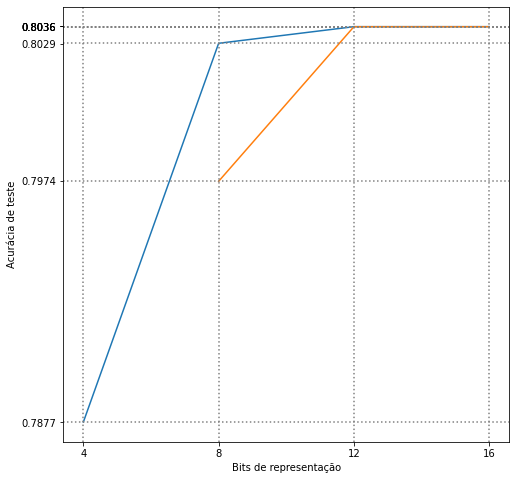

In [ ]:
#Acurácia
y_frac_acc = [p4_vs_real_accuracy, p4_vs_real_accuracy_q16_12, p4_vs_real_accuracy_q16_8, p4_vs_real_accuracy_q16_4]
y_int_acc = [p4_vs_real_accuracy, p4_vs_real_accuracy_q12_16, p4_vs_real_accuracy_q8_16]
x_frac_bits = [16, 12, 8, 4]
x_int_bits = [16, 12, 8]

plt.figure(figsize=[8, 8])
plt.plot(x_frac_bits, y_frac_acc)
plt.plot(x_int_bits, y_int_acc)

plt.ylabel('Acurácia de teste')
plt.xlabel('Bits de representação')
#plt.title('Acurácias de teste para Q16.x e Qx.16')
y = [*y_int_acc , *y_frac_acc]

for i in y:
  plt.axhline(i, color="grey", linestyle=":")
for i in x_frac_bits:
  plt.axvline(i, color="grey", linestyle=":")

for i,x in enumerate(y_frac_acc):
  y_frac_acc[i] = float("{0:.4f}".format(x))
for i,x in enumerate(y_int_acc):
  y_int_acc[i] = float("{0:.4f}".format(x))

y = [*y_int_acc , *y_frac_acc]
# a = np.arange(0.785,0.805,0.005)
# y = [*a , *y_acc]
plt.yticks(y)
plt.xticks(x_frac_bits)

# now = datetime.now()
# dt_string = now.strftime("%d-%m-%Y %H:%M:%S")
# title = "/content/drive/MyDrive/network-traffic-classification-main/nn-reports/Acc_per_frac_bits_%s"%dt_string + ".pdf"
# plt.savefig(title)


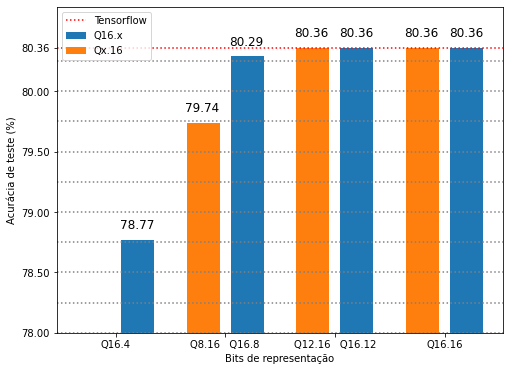

In [ ]:
#Acurácia
y_frac_acc = [p4_vs_real_accuracy_q16_4*100, p4_vs_real_accuracy_q16_8*100, p4_vs_real_accuracy_q16_12*100, p4_vs_real_accuracy*100]
y_int_acc = [0,  p4_vs_real_accuracy_q8_16*100, p4_vs_real_accuracy_q12_16*100, p4_vs_real_accuracy*100]
X = ["Q16.4", "Q8.16   Q16.8", "Q12.16   Q16.12", "Q16.16"]
#X = [4, 8, 12, 16]

plt.figure(figsize=[8, 6])

X_axis = np.arange(len(X))
barWidth = 0.3
plt.bar(X_axis + 0.2, y_frac_acc, width = barWidth, label ='Q16.x')
plt.bar(X_axis - 0.2, y_int_acc, width = barWidth, label ='Qx.16')

plt.ylabel('Acurácia de teste (%)')
plt.xlabel('Bits de representação')
#plt.xlabel('Bits de representação da parte vairável')
#plt.title('Acurácias de teste para Q16.x e Qx.16')

ab = np.arange(78,80.4,0.25)
a = np.arange(78,80.4,0.5)
a = np.insert(a,-1,float("{0:2.2f}".format(p4_vs_real_accuracy*100)))

plt.yticks(a)
plt.xticks(X_axis, X)
plt.ylim(78,80.7)
for i in ab:
  plt.axhline(i, color="grey", linestyle=":")

plt.axhline(p4_vs_real_accuracy*100, color="red", linestyle=":", label = "Tensorflow")

for index,data in enumerate(y_frac_acc):
    if data > 0 :
      data = float("{0:2.2f}".format(data))
      plt.text(x = index + 0.04,  y = data+0.09, s=f"{data}", fontdict=dict(fontsize=12))

for index,data in enumerate(y_int_acc):
    if data > 0:
      data = float("{0:2.2f}".format(data))
      plt.text(x = index - 0.37,  y =data+0.09 , s=f"{data}", fontdict=dict(fontsize=12))

plt.legend(loc=2)

now = datetime.now()
dt_string = now.strftime("%d-%m-%Y %H:%M:%S")
title = "/content/drive/MyDrive/network-traffic-classification-main/nn-reports/acc_per_bits_%s"%dt_string + ".pdf"
plt.savefig(title)

plt.show()

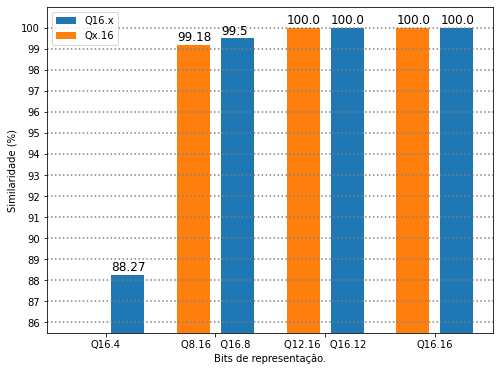

In [ ]:
#Similaridade externa
# y_frac_acc = [p4_vs_tf_accuracy*100, p4_vs_tf_accuracy_q16_12*100, p4_vs_tf_accuracy_q16_8*100, p4_vs_tf_accuracy_q16_4*100]
# y_int_acc = [p4_vs_tf_accuracy*100, p4_vs_tf_accuracy_q12_16*100, p4_vs_tf_accuracy_q8_16*100,0]
# X = [4, 8, 12, 16]
y_frac_acc = [p4_vs_tf_accuracy_q16_4*100, p4_vs_tf_accuracy_q16_8*100, p4_vs_tf_accuracy_q16_12*100, p4_vs_tf_accuracy*100]
y_int_acc = [0,  p4_vs_tf_accuracy_q8_16*100, p4_vs_tf_accuracy_q12_16*100, p4_vs_tf_accuracy*100]
X = ["Q16.4", "Q8.16   Q16.8", "Q12.16   Q16.12", "Q16.16"]

plt.figure(figsize=[8, 6])

X_axis = np.arange(len(X))
barWidth = 0.3
plt.bar(X_axis+0.2, y_frac_acc, width = barWidth, label ='Q16.x')
plt.bar(X_axis-0.2, y_int_acc, width = barWidth, label ='Qx.16')

plt.ylabel('Similaridade (%)')
plt.xlabel('Bits de representação.')
#plt.title('Similaridade entre a RNA instanciada no ambiente P4 com a RNA instanciada no Tensorflow para Q16.x e Qx.16')

a = np.arange(85,101,1)
plt.yticks(a)
plt.xticks(X_axis, X)
plt.ylim(85.5,101)
for i in a:
  plt.axhline(i, color="grey", linestyle=":")

for index,data in enumerate(y_frac_acc):
    if data > 0 :
      data = float("{0:2.2f}".format(data))
      plt.text(x = index+0.05,  y =data+0.2 , s=f"{data}", fontdict=dict(fontsize=12))

for index,data in enumerate(y_int_acc):
    if data > 0:
      data = float("{0:2.2f}".format(data))
      plt.text(x = index-0.35,  y =data+0.2 , s=f"{data}", fontdict=dict(fontsize=12))

plt.legend(loc=2)

now = datetime.now()
dt_string = now.strftime("%d-%m-%Y %H:%M:%S")
title = "/content/drive/MyDrive/network-traffic-classification-main/nn-reports/similarity_per_bits_%s"%dt_string + ".pdf"
plt.savefig(title)

plt.show()

In [ ]:
tf_probabilities_list = df_tf.values.tolist()

p4_q16_16_frac_mult_probabilities_list = df_q16_16.values.tolist()
differences = np.zeros((df_q16_16.shape[0], df_q16_16.shape[1]))


for i in range(df_q16_16.shape[0]):
  for j in range(df_q16_16.shape[1]):
    differences[i][j] = abs(p4_q16_16_frac_mult_probabilities_list[i][j] - tf_probabilities_list[i][j])

max_value = max(differences[0])
min_value = min(differences[0])
for row in differences[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("P4 Fractional Multiplication Q16.16")
print("max: ",max_value,"min: ", min_value)
df_differences_q16_16_frac_mult = pd.DataFrame(differences)

#####

p4_q16_16_norm_table_probabilities_list = df_p4_q16_16_norm_table.values.tolist()
differences = np.zeros((df_p4_q16_16_norm_table.shape[0], df_p4_q16_16_norm_table.shape[1]))

for i in range(df_p4_q16_16_norm_table.shape[0]):
  for j in range(df_p4_q16_16_norm_table.shape[1]):
    differences[i][j] = abs(p4_q16_16_norm_table_probabilities_list[i][j] - tf_probabilities_list[i][j])

max_value = max(differences[0])
min_value = min(differences[0])
for row in differences[1:]:
    max_value = max(max_value, max(row))
    min_value = min(min_value, min(row))

print("P4 Normalization tables Q16.16")
print("max: ",max_value,"min: ", min_value)
df_differences_q16_16_norm_table = pd.DataFrame(differences)

P4 Fractional Multiplication Q16.16
max:  0.04206170898437733 min:  0.0
P4 Normalization tables Q16.16
max:  0.0008079248046897192 min:  0.0


In [ ]:
errors_q16_16 = []
errors_q16_12 = []


for i in range(1,13):
  errors_q16_16_frac_mult = errors_q16_16 + df_differences[i].values.tolist()
  errors_q16_16_norm_table = errors_q16_12 + df_differences_q16_12[i].values.tolist()


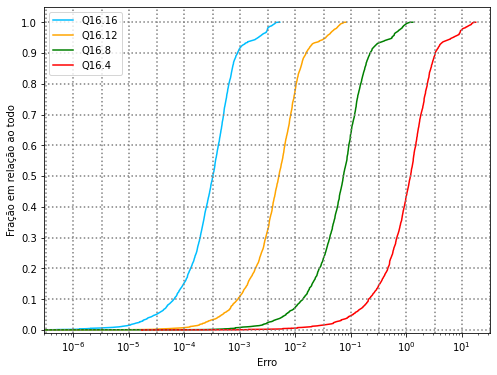

In [ ]:
plt.figure(figsize=[8, 6])
plt.plot(sorted(errors_q16_16),np.arange(len(errors_q16_16))/len(errors_q16_16),color="deepskyblue", label="Q16.16")
plt.plot(sorted(errors_q16_12),np.arange(len(errors_q16_12))/len(errors_q16_12),color="orange", label="Q16.12")
plt.plot(sorted(errors_q16_8),np.arange(len(errors_q16_8))/len(errors_q16_8),color="green", label="Q16.8")
plt.plot(sorted(errors_q16_4),np.arange(len(errors_q16_4))/len(errors_q16_4),color="red", label="Q16.4")


plt.ylabel('Fração em relação ao todo')
plt.xlabel('Erro')
#plt.title('Função distribuição acumulada')
plt.legend(loc=2)

y=np.arange(0.0,1.1,0.1)
x=[0.00000033,0.000001,0.0000033,0.00001,0.000033,0.0001,0.00033,0.001,0.0033,0.01,0.033,0.1,0.33,1,3.3,10,33]
plt.yticks(y)
plt.xticks(x)
plt.ylim(-0.01,1.05)
plt.xlim(0.0000003,33)
for i in y:
  plt.axhline(i, color="grey", linestyle=":")
for i in x:
  plt.axvline(i, color="grey", linestyle=":")

plt.xscale("log")

now = datetime.now()
dt_string = now.strftime("%d-%m-%Y %H:%M:%S")
title = "/content/drive/MyDrive/network-traffic-classification-main/nn-reports/CDF_fixed_integer_%s"%dt_string + ".pdf"
plt.savefig(title)


In [ ]:
# df_tf = df_tf.head(1000)
# df_p4 = df_p4.head(1000)

# differences_zeros = np.zeros((df_p4.shape[0], df_p4.shape[1]))
# print(differences_zeros.shape)
# df_differences = pd.DataFrame(differences_zeros)

# for i in range(df_p4.shape[0]):
#   for j in range(df_p4.shape[1]):
#     df_differences.loc[i][j] = abs(df_p4.loc[i][j] - df_tf.loc[i][j])

# display(df_differences)


In [ ]:
# df_p4.drop(columns=df_p4.columns[0], axis=1, inplace=True)
# p4_predictions = df_p4.columns[0]
# df_p4.drop(columns=df_p4.columns[0], axis=1, inplace=True)
# displaydf_p4_q16_16

# tf_predictions = df_tf.columns[0]
# df_tf.drop(columns=df_tf.columns[0], axis=1, inplace=True)
# display(df_tf)
